In [1]:
from Analyzer import *

Calculating power spectrum...


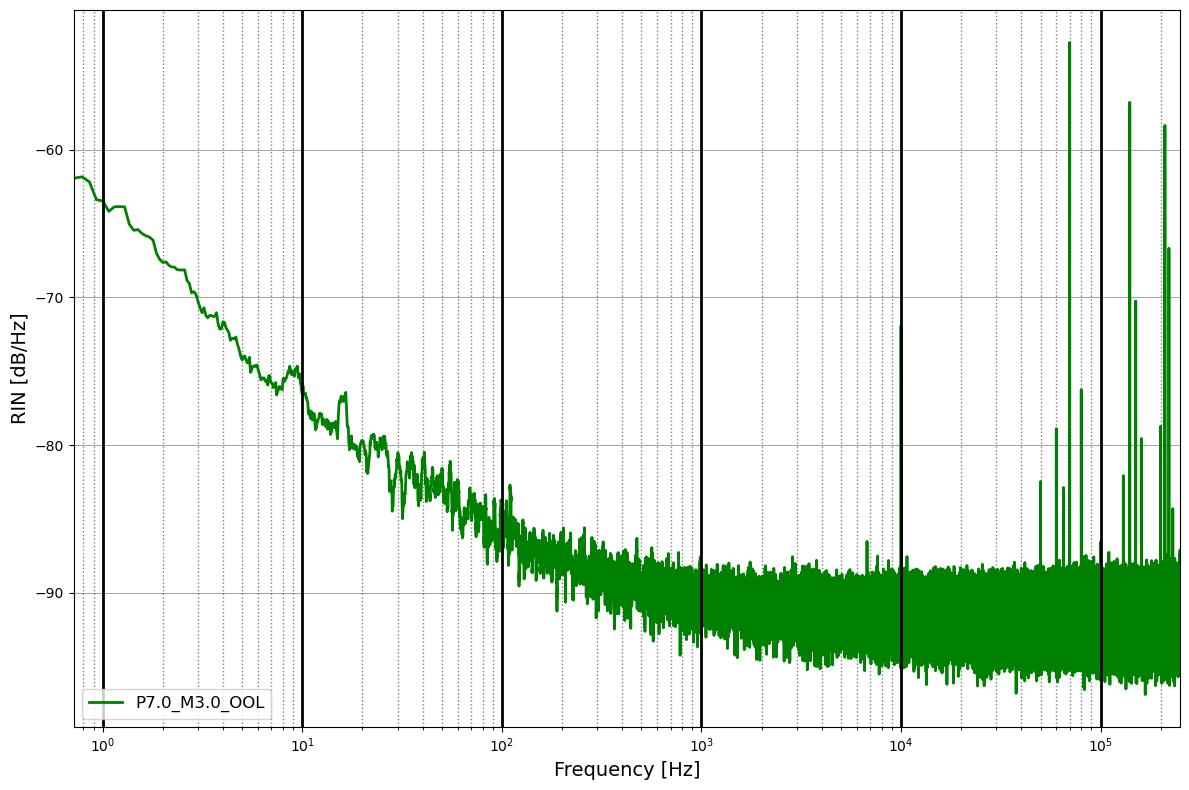

In [2]:
"""Synthetic data to validate analysis"""
# # Generate time series data with values against time in seconds
# num_seconds = 10  # Total number of seconds
# time        = np.arange(0, num_seconds, 1/30)  # Create timestamp index
# voltage     = np.sin(2*np.pi*4*time) + np.sin(2*np.pi*7*time) + np.random.randn(len(time))*0.2  # Generate 4 Hz and 7 Hz sine wave
# data = np.column_stack((time, voltage))

"""Real data"""    

ac_filename_list = ["20240807/AC Coupling/P1.0_M0_OOL",
                    "20240807/AC Coupling/P5.0_M1.1_OOL",
                    "20240807/AC Coupling/P6.0_M2.1_OOL",
                    "20240807/AC Coupling/P7.0_M3.0_OOL"]

dc_filename_list = ["20240807/DC Coupling/P1.0_M0_OOL",
                    "20240807/DC Coupling/P5.0_M1.1_OOL",
                    "20240807/DC Coupling/P6.0_M2.1_OOL",
                    "20240807/DC Coupling/P7.0_M3.0_OOL"]

idx = 3

filename = ac_filename_list[idx]
dir      = str(globals()['_dh'][0]).replace('\\','/') + "/Time-Series-Data/"
filepath_data = dir + filename + ".csv"
ac_data = extract_data(filepath_data)

filename = dc_filename_list[idx]
dir      = str(globals()['_dh'][0]).replace('\\','/') + "/Time-Series-Data/"
filepath_data = dir + filename + ".csv"
dc_data = extract_data(filepath_data)

# Extract the first and second columns from data_array
dc_voltages                   = dc_data[:, 1]
ac_time                       = ac_data[:, 0]

processed_ac_data, Sxx_smooth = compute_psd(ac_data)

dt      = ac_time[1] - ac_time[0]                     # Sampling interval / time step
N       = ac_time.shape[0]                            # Total number of data points
f_s     = 1 / dt                                      # Sampling frequency
delta_f = f_s/N;                                      # Step size in frequency domain

Skk, RIN_Sxx_smooth           = compute_RIN(dc_voltages, delta_f, Sxx_smooth)

# plot_psd(processed_ac_data, Sxx_smooth, filename.split('/')[-1])

plot_rin(processed_ac_data, RIN_Sxx_smooth, filename.split('/')[-1])

In [ ]:
plot_e_folding_time(processed_ac_data, Skk, 100, 1000, filename.split('/')[-1])

In [ ]:
plot_e_folding_time(processed_ac_data, Skk, 1000, 5000, filename.split('/')[-1])